## World Cup Matches

We use World Cup Matches dataset from [Kaggle](https://www.kaggle.com/abecklas/fifa-world-cup) to go over the basic functions in Python. [FIFA World Cup](https://en.wikipedia.org/wiki/FIFA_World_Cup), often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA). World Cup starts at 1930 and is held every 4 years. 

Now please follow the instructions below and complete 8 questions. Remember, as a business analyst, it is more important to make interpretation of the results rather than endless tunning code. Don't waste time to make comments or find efficient algorithms. Concentrate more on how to explain the results you get from the data. Think thoroughly and creatively. Don't forget about the domain knowledge! 

In [26]:
# use pandas to read csv dataset
import pandas as pd
import numpy as np
# set globally the displayed maximum number of columns in the dataframe as 100
pd.set_option('display.max_columns', 100)
# import data
import io
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


In [0]:
# read data
matches = pd.read_csv(io.StringIO(uploaded['WorldCupMatches.csv'].decode('latin-1')))

### Q1. Please check the duplicates and remove them. Then show the head of the dataframe

In [3]:
# Your code
matches.shape

(852, 20)

In [4]:
matches=matches.drop_duplicates()
matches.shape

(836, 20)

In [221]:
matches.head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,goal_diff
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,3
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,3
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,1
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,2
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,1


### Q2. How many columns and rows in the dataset, after dropping the duplicates? 

In [7]:
# Your code
matches.shape

(836, 20)

There are 20 columns and 836 rows in the dataset after dropping the duplicates.

### Q3. So far, how many World Cup sessions have been held, excluding 2018 FIFA World Cup Russia? Which years have missed the world cup? Why?

In [19]:
# Your code

nsessions=0
if (2018 not in matches['Year']):
  nsessions=matches['Year'].nunique()
else:
  nsessions=matches['Year'].nunique()-1
print(nsessions)

20


In [82]:
missing=[]
sessions=matches['Year'].unique()
for i in range(19):
  if (sessions[i+1]-sessions[i]>4):
    n=(sessions[i+1]-sessions[i])/4
    for k in range(1,n):
      missing.append(sessions[i]+4*k)
missing

[1942, 1946]

In [91]:
sessions

array([1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978,
       1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014])

*Your explanation:*
20 sessions have been hold each 4 years since 1930, with the excepitons in 1942 and 1946. Both sessions were cancelled due to world war II.

### Q4. List the (country, # of champions) pairs, sorting by "# of champions" in descending way.

Notes:
* Your list should be like this [('Brazil', 5), ('Italy',4), ...], which means that Brazil won five times World Cup champions and Italy won four times...
* List only countries that have won the championship.
* Claim anything you find interesting or strange, comparing with the true domain knowledge

In [128]:
from collections import Counter

# Your code
final=matches[['Home Team Name','Home Team Goals','Away Team Goals','Away Team Name','Win conditions']][matches.Stage=='Final']
final.shape
#missing 1950 final round data
final['winner'] = np.where(final['Home Team Goals'] > final['Away Team Goals'],final['Home Team Name'], (np.where(final['Home Team Goals'] < final['Away Team Goals'], final['Away Team Name'], final['Win conditions'].str.split().str[0])))                         
final

,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,winner
17,Uruguay,4,2,Argentina,,Uruguay
34,Italy,2,1,Czechoslovakia,Italy win after extra time,Italy
52,Italy,4,2,Hungary,,Italy
100,Germany FR,3,2,Hungary,,Germany FR
135,Brazil,5,2,Sweden,,Brazil
167,Brazil,3,1,Czechoslovakia,,Brazil
199,England,4,2,Germany FR,England win after extra time,England
231,Brazil,4,1,Italy,,Brazil
269,Netherlands,1,2,Germany FR,,Germany FR
307,Argentina,3,1,Netherlands,Argentina win after extra time,Argentina


In [134]:
final['freq'] = final.groupby('winner')['winner'].transform('count')
subset = final[['winner','freq']]
results = sorted(list(set([tuple(x) for x in subset.values])), key=lambda x: x[1],reverse=True) 
results

[('Brazil', 5),
 ('Italy', 4),
 ('Germany FR', 3),
 ('Argentina', 2),
 ('Spain', 1),
 ('Uruguay', 1),
 ('Germany', 1),
 ('France', 1),
 ('England', 1)]

*Your explanation:*
Matches before 1968 Germany was referred to as Germany FR and after simply Germany. In addition, the dataset does not contain match records after group stage for the year 1950. Uruguay was the champion that year.  

### Q5. Plot the change of average number of attendance for each match in each session of world cup, along with the Year

Notes: 
* Year in x-axis and average number of attendance in y-axis
* The average number of attendance is equal to the total number of attendance divided by the total number of matches
* Draw bar plot
* Don't forget the title, xlabel and ylabel!
* Find anything interesting in the plot and give explanations

Text(0.5,1,u'Average Match Attendance By Year')

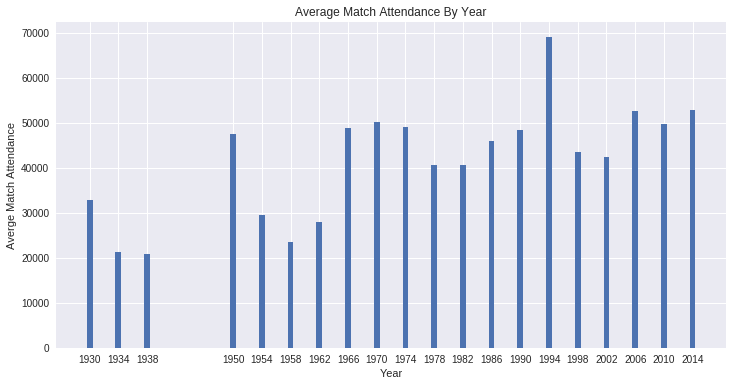

In [196]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
year=matches['Year'].unique()
# Your code
total_attendance=matches.groupby('Year')['Attendance'].sum()
total_matches=matches.groupby('Year')['MatchID'].count()
average=total_attendance/total_matches
average
plt.bar(year,average)
plt.xticks(year)
plt.xlabel('Year')
plt.ylabel('Averge Match Attendance')
plt.title('Average Match Attendance By Year')

*Your explanation:*
1994 has an unusually high average attendance. It was held in the US and with the aid of high-capacity stadia in the United States, it broke the World Cup average attendance record with nearly 69,000 spectators per game

### Q6. Plot the change of total number of attended teams for each session of world cup, along with Year

Notes:
* Year in x-axis and total number of teams in y-axis
* Including title, xlabel and ylabel
* Draw bar plot
* When calculating the total number of teams, use "Initals" instead of "Name"
* Explain anything you find interesting

Text(0.5,1,u'Total number of attended team By Year')

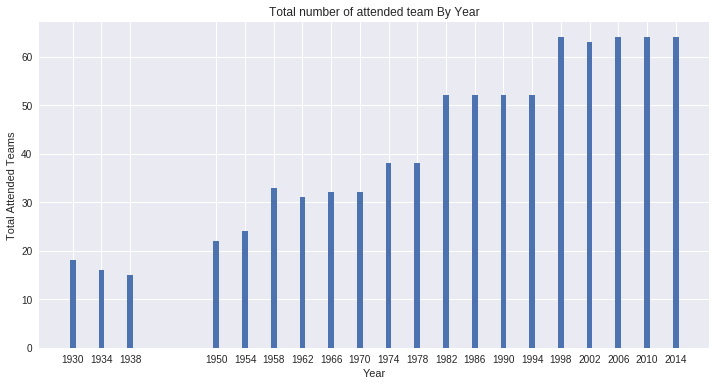

In [220]:
# Your code
x=[]
y=[]
for i in year:
  x.append(i)
  data=matches.loc[matches['Year'] == i]
  y.append(data.groupby(['Home Team Initials', 'Away Team Initials']).ngroups)
plt.bar(x,y)
plt.xticks(x)
plt.xlabel('Year')
plt.ylabel('Total Attended Teams')
plt.title('Total number of attended team By Year')

*Your explanation:*
Number of participating teams increase in stages. There are major pumps in team numbers in 1958,1982,1998, where number of teams maintain at a stable level for a decade or so following these years, until the next pump year comes.

### Q7. What is the distribution of the goal difference?

Notes:
* "Goal difference" is the difference between "Home Team Goals" and "Away Team Goals"
* Use histogram plot, with bin=100
* Summary the necessary statistics
* Explain as much as you can

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   7.,   0.,   0.,   0.,
          0.,   0.,   0.,  25.,   0.,   0.,   0.,   0.,   0.,  45.,   0.,
          0.,   0.,   0.,   0.,  92.,   0.,   0.,   0.,   0.,   0., 186.,
          0.,   0.,   0.,   0.,   0.,   0., 234.,   0.,   0.,   0.,   0.,
          0., 125.,   0.,   0.,   0.,   0.,   0.,  62.,   0.,   0.,   0.,
          0.,   0.,  25.,   0.,   0.,   0.,   0.,   0.,   0.,  17.,   0.,
          0.,   0.,   0.,   0.,   7.,   0.,   0.,   0.,   0.,   0.,   3.,
          0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,
          3.]),
 array([-7.  , -6.84, -6.68, -6.52, -6.36, -6.2 , -6.04, -5.88, -5.72,
        -5.56, -5.4 , -5.24, -5.08, -4.92, -4.76, -4.6 , -4.44, -4.28,
        -4.12, -3.96, -3.8 , -3.64, -3.48, -3.32, -3.16, -3.  , -2.84,
        -2.68, -2.52, -2.36, -2.2 , -2.04, -1.88, -1.72, -1.56, -1.4 ,
        -1.24, -1.08, -0.92, -0.76

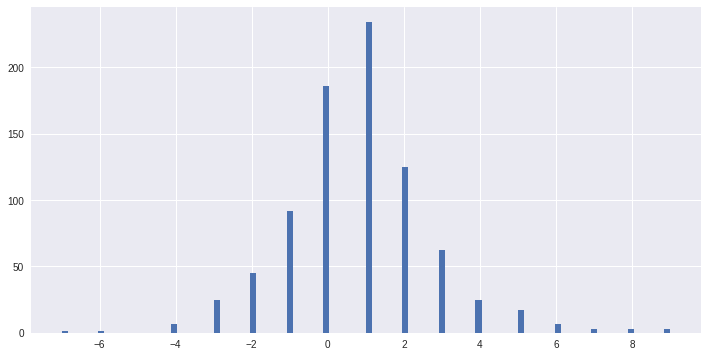

In [184]:
# Your code
matches['goal_diff']=matches['Home Team Goals']-matches['Away Team Goals']
plt.hist(matches['goal_diff'], bins=100)

*Your explanation:*
Goal difference has an approximately normal distribution, with median difference around 1. The concentration around 0/1 score differences makes sense, since vast goal differences is rarely the case for soccer games. 

### Q8. Is the average goal difference statistically equal to 0? How would you test it?

* Please use one-sample t-test
* Calculate the p-value

In [193]:
!pip install plotly
import plotly.plotly as py
from scipy.stats import ttest_1samp
from plotly.tools import FigureFactory as FF
# Your code
true_mu = 0

onesample_results = ttest_1samp(matches['goal_diff'], true_mu)

matrix_onesample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', onesample_results[0], onesample_results[1]]
]

matrix_onesample

[['', 'Test Statistic', 'p-value'],
 ['Sample Data', 12.031825898342529, 7.311141197155588e-31]]

*Your explanation:*
Since the p-value is less than significance level 0.05, the null hypthesis that true goal difference equals to 0 is rejected. The sample suggested that the true goal difference between home home team and away team is statistically different from 0. This suggests that on average home team goals will be different from away home goals. Since the t-statistics is positive, the data suggests that on average home teams goal more than away teams.  